In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [44]:
feat_AUS = pd.read_pickle('../data/[feature_data]/AUS/feature_data_AUS.pkl')
feat_AUS_test = pd.read_pickle('../data/[feature_data]/AUS/feature_data_AUS_test.pkl')

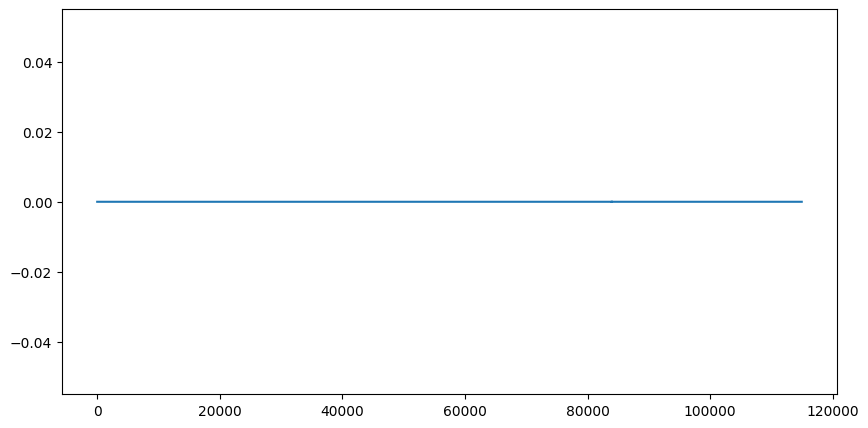

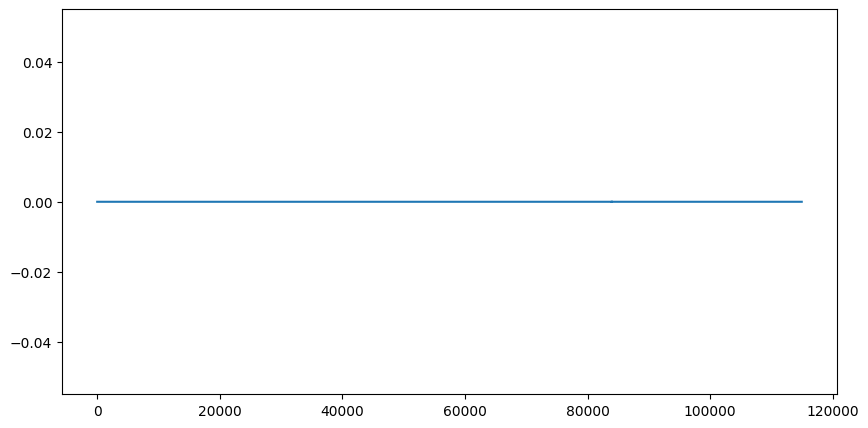

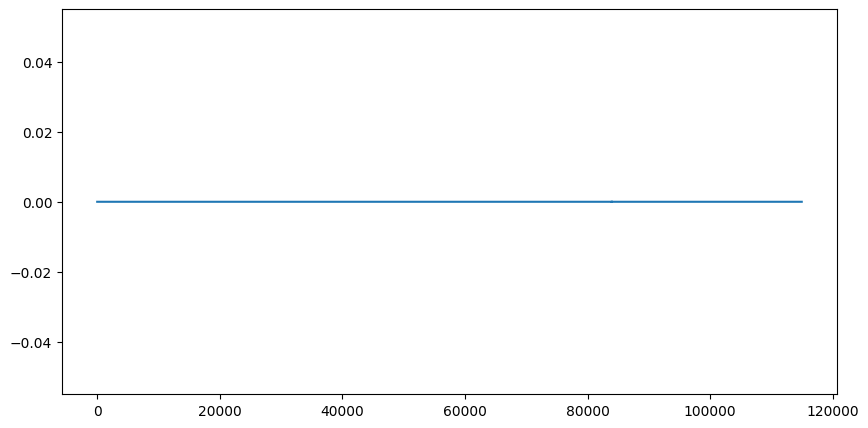

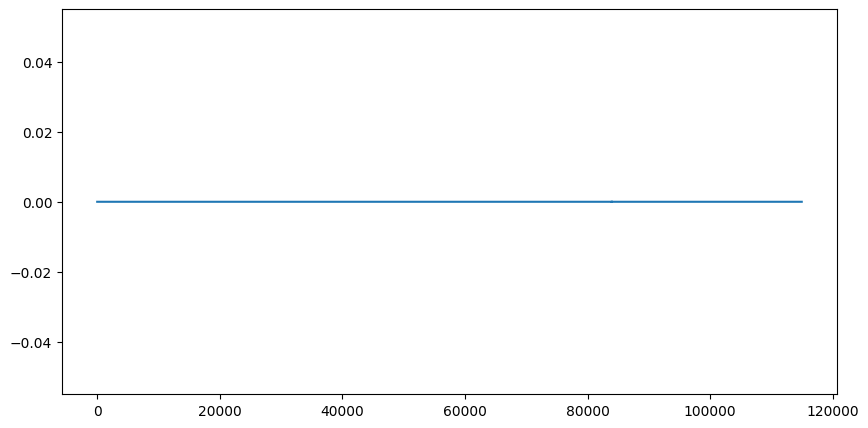

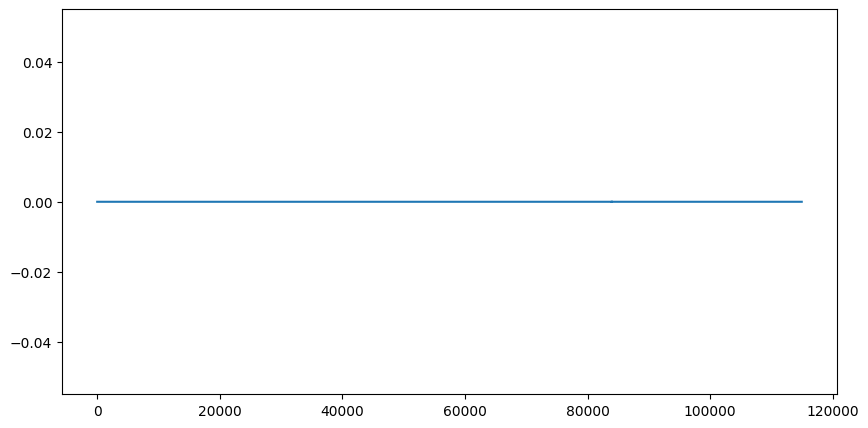

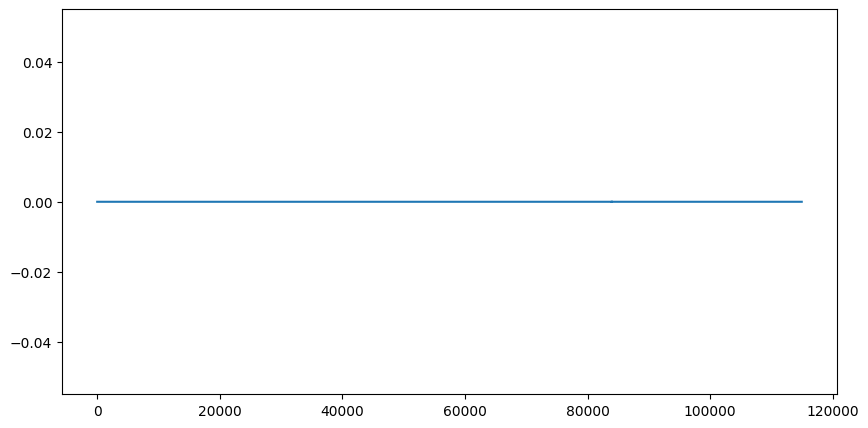

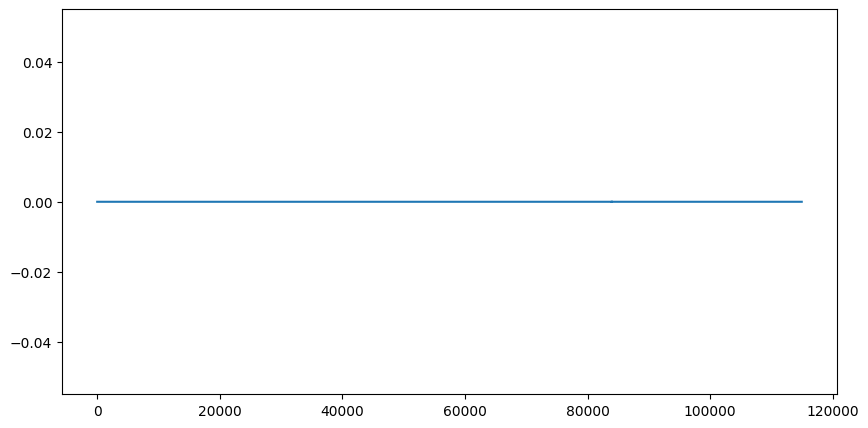

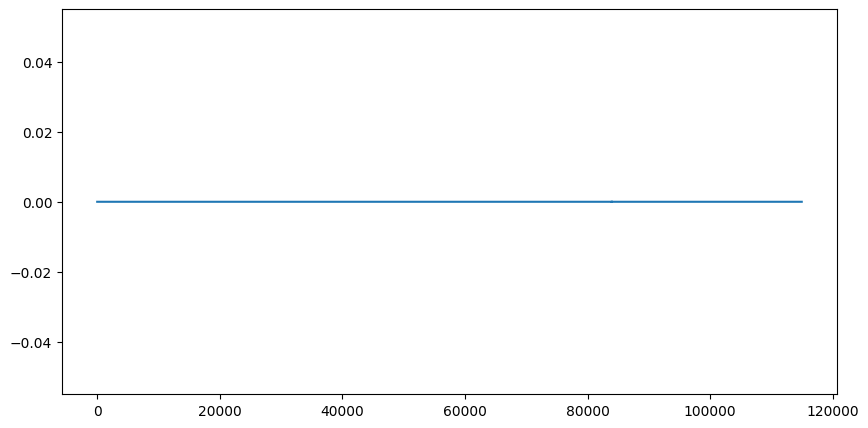

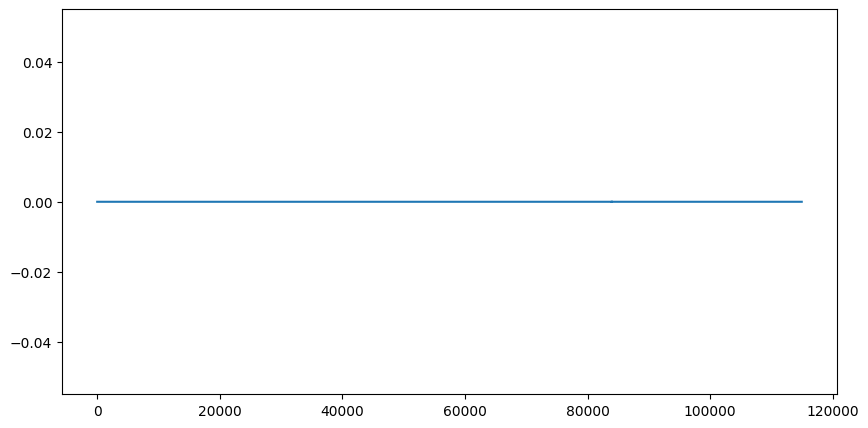

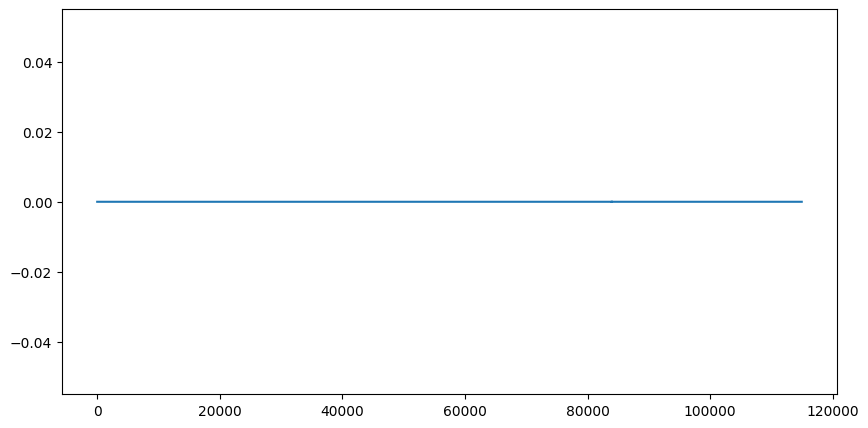

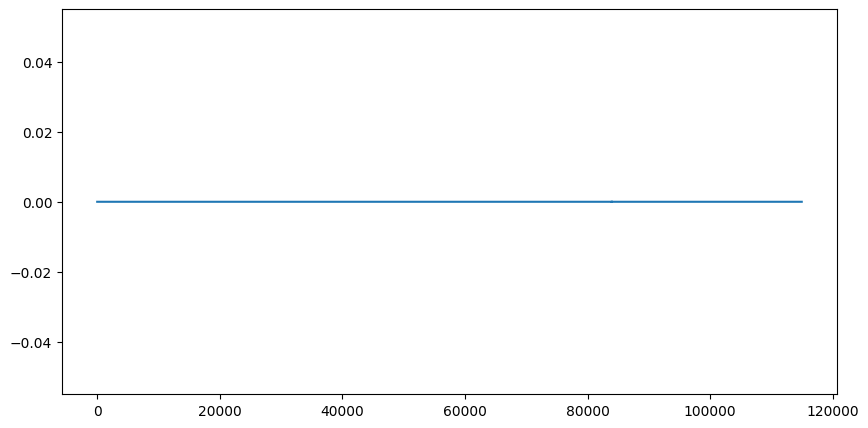

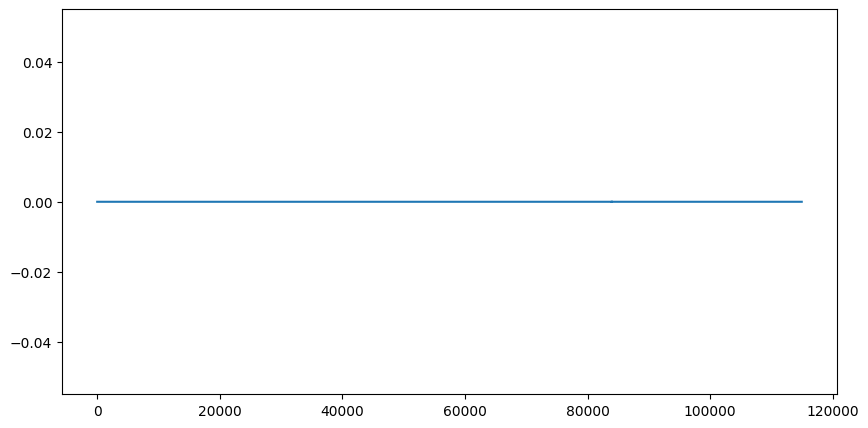

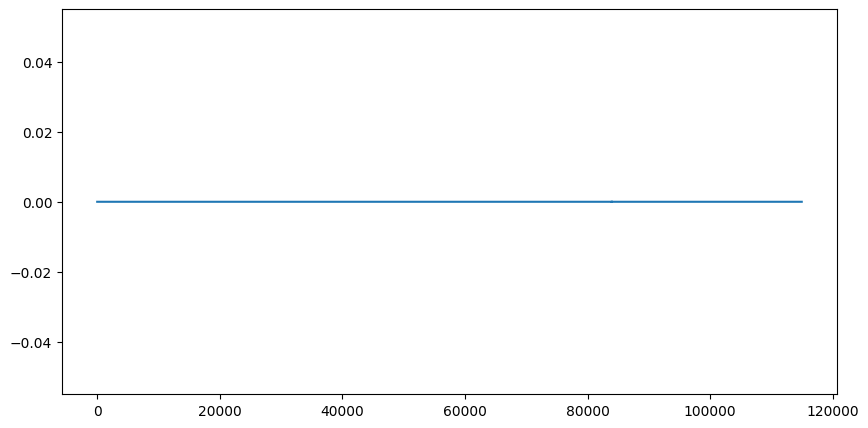

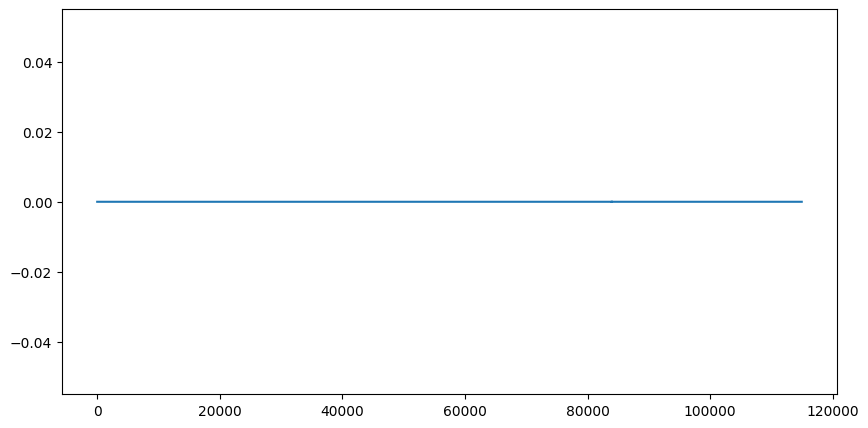

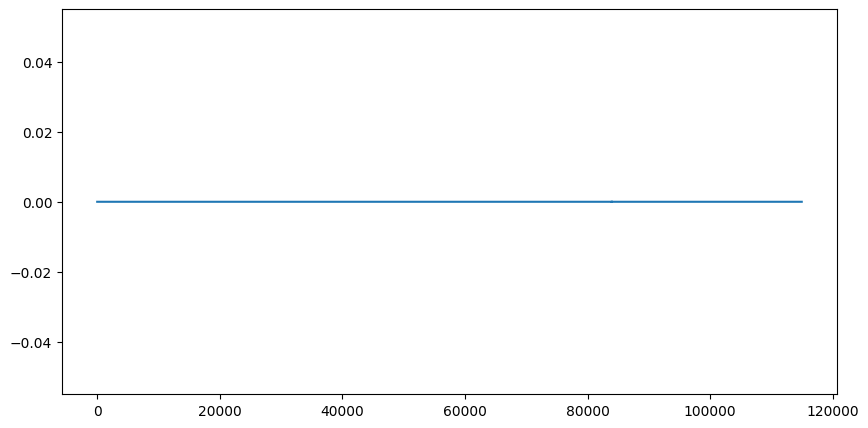

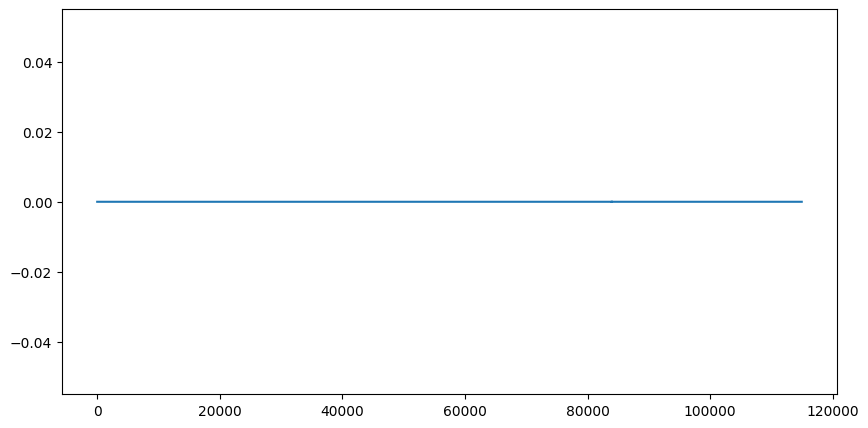

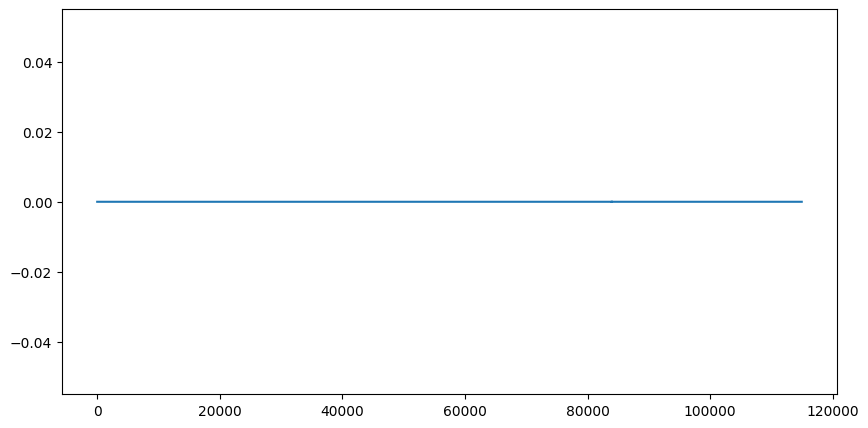

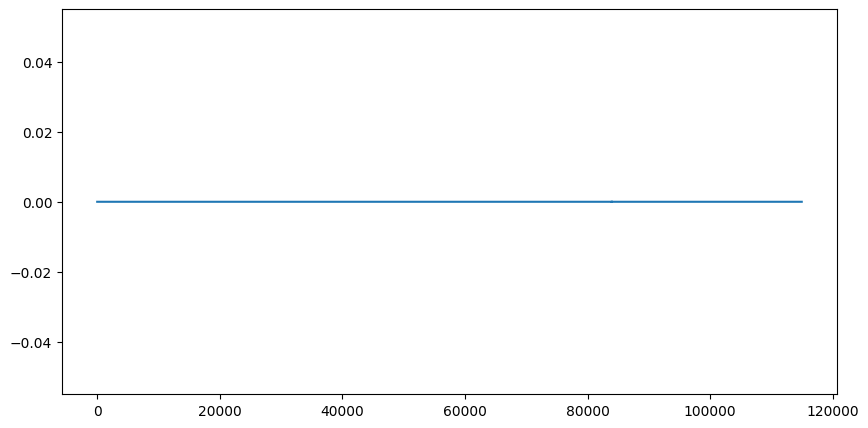

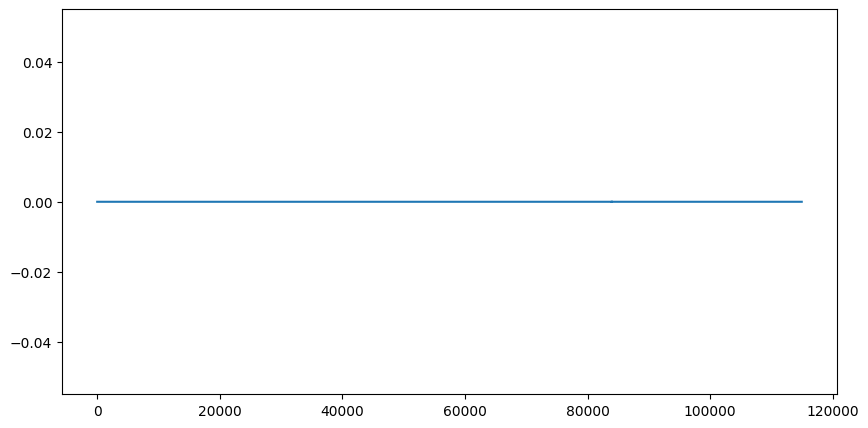

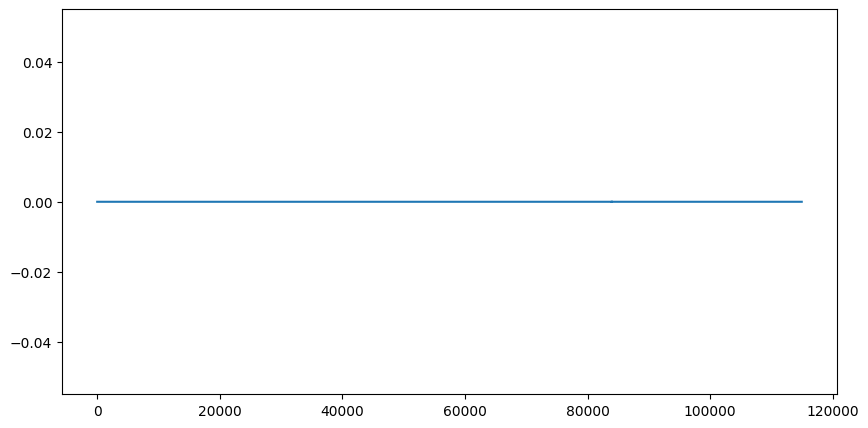

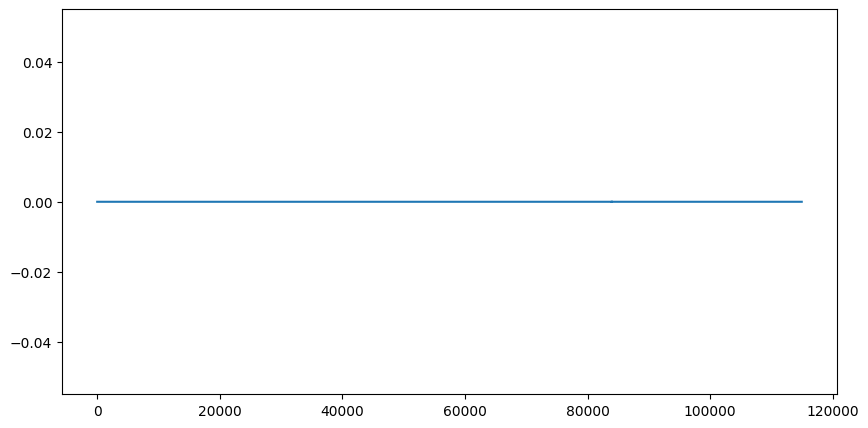

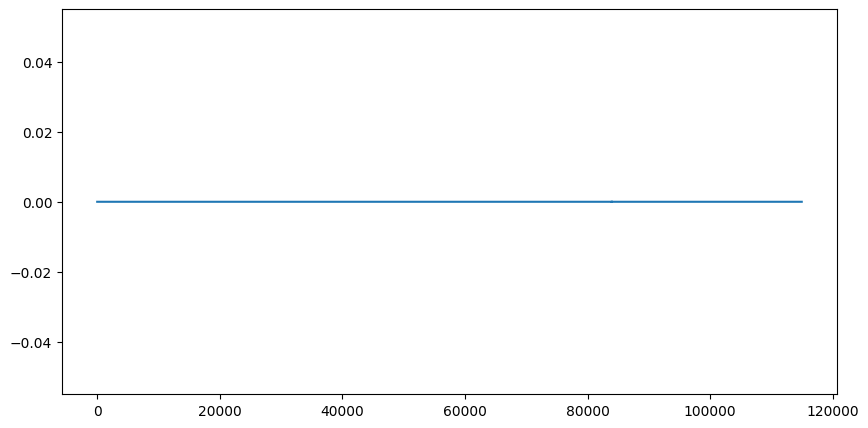

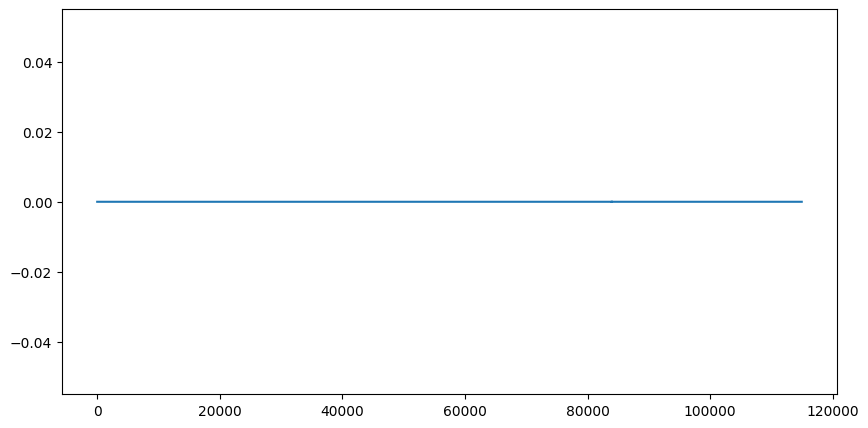

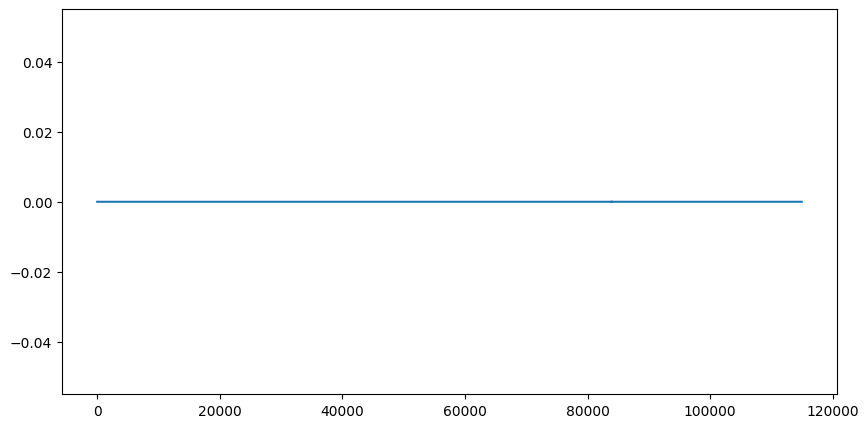

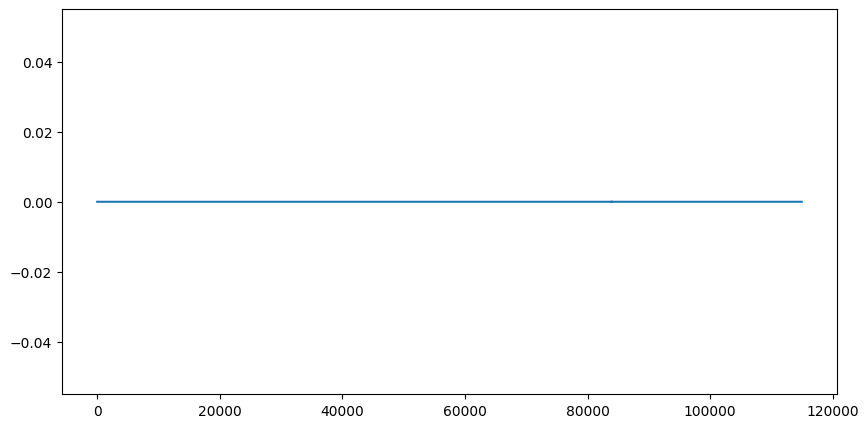

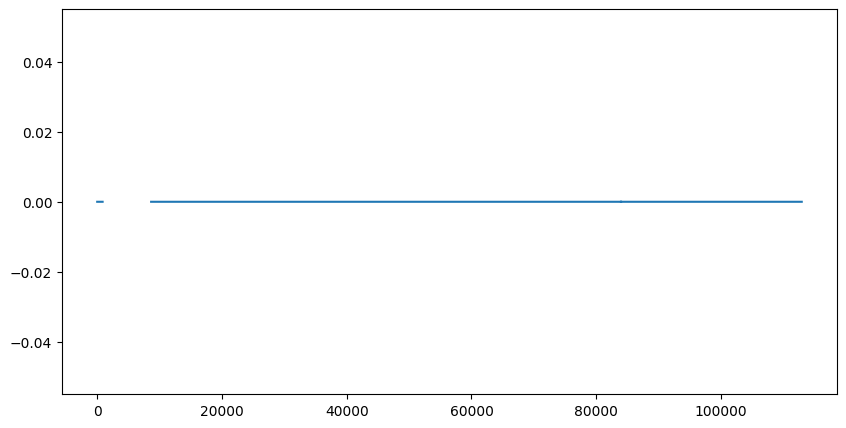

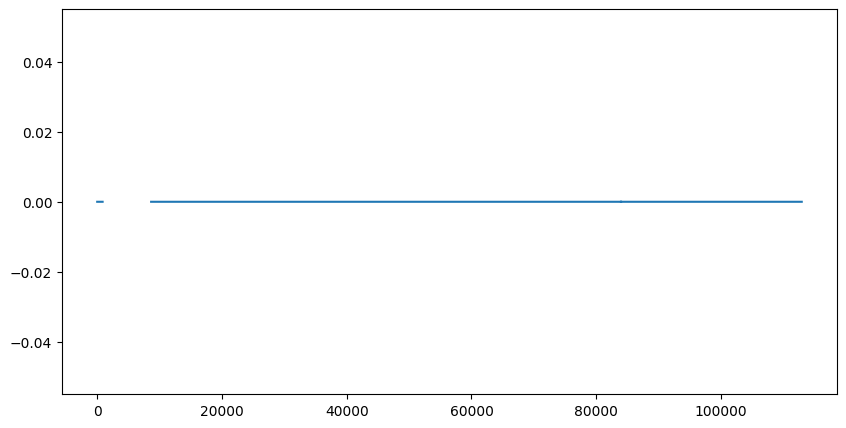

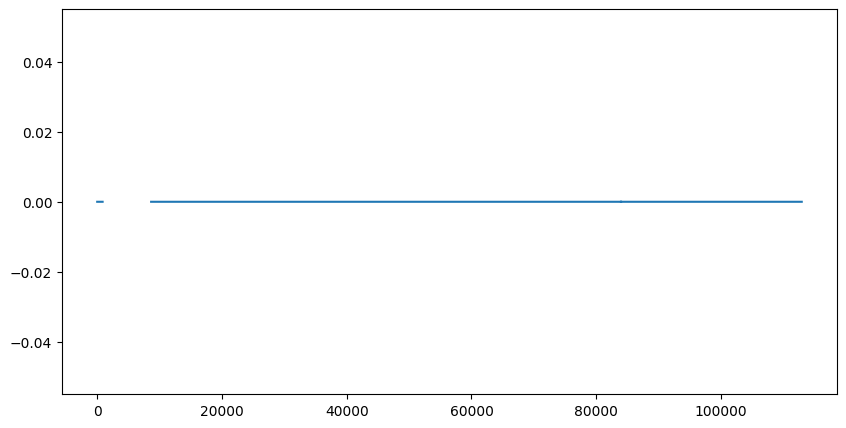

In [46]:
for col in feat_AUS.columns:
    plt.figure(figsize = (10,5))
    plt.plot(feat_AUS[col].values-feat_AUS_test[col].values)
    plt.show()

In [18]:
feat_input_actual = pd.read_hdf('../data/[feature_data]/AUS/input_actual.h5')

In [19]:
freq = pd.read_pickle('../data/Mainland_AUS_frequency_data_2021-2024.pkl')

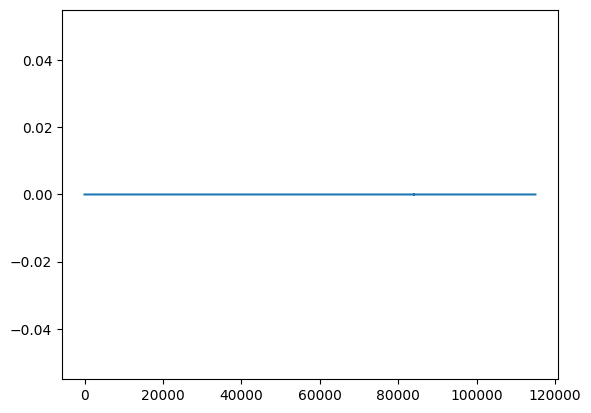

In [20]:
plt.plot(feat_AUS['Wind'].values - feat_input_actual['Wind_gen'].values)

In [21]:
feat_input_actual = pd.read_pickle('../data/[feature_data]/AUS/input_actual.pkl')

In [22]:
feat_nemosis = feat_input_actual.loc['2023-02-12 00:05:00+10:00':]#['MWFLOW']

In [23]:
feat_AUS.columns,feat_nemosis.columns

(Index(['Aggregator (VPP)', 'Aggregator (Demand / Response)', 'Network Import',
        'Network Export', 'Interconnector', 'Battery (Charging)',
        'Battery (Discharging)', 'Biomass', 'Coal (Black)', 'Coal (Brown)',
        'Distillate', 'Gas (CCGT)', 'Gas (OCGT)', 'Gas (Reciprocating)',
        'Gas (Steam)', 'Gas (Coal Mine Waste)', 'Hyrdo', 'Pumps',
        'Solar (Utility)', 'Solar (Thermal)', 'Wind', 'Nuclear', 'Biogas',
        'Solar (Rooftop)', 'QI (Solar (Rooftop))', 'METEREDMWFLOW (Trading)',
        'MWFLOW (Trading)', 'MWLOSSES (Trading)'],
       dtype='object'),
 Index(['generation: Battery and Inverter, Descriptor: -',
        'generation: Battery storage, Descriptor: Grid',
        'generation: Battery storage, Descriptor: Wind',
        'generation: Battery, Descriptor: -',
        'generation: Fossil, Descriptor: Black Coal',
        'generation: Fossil, Descriptor: Brown Coal',
        'generation: Fossil, Descriptor: Coal Seam Methane',
        'generation: Fo

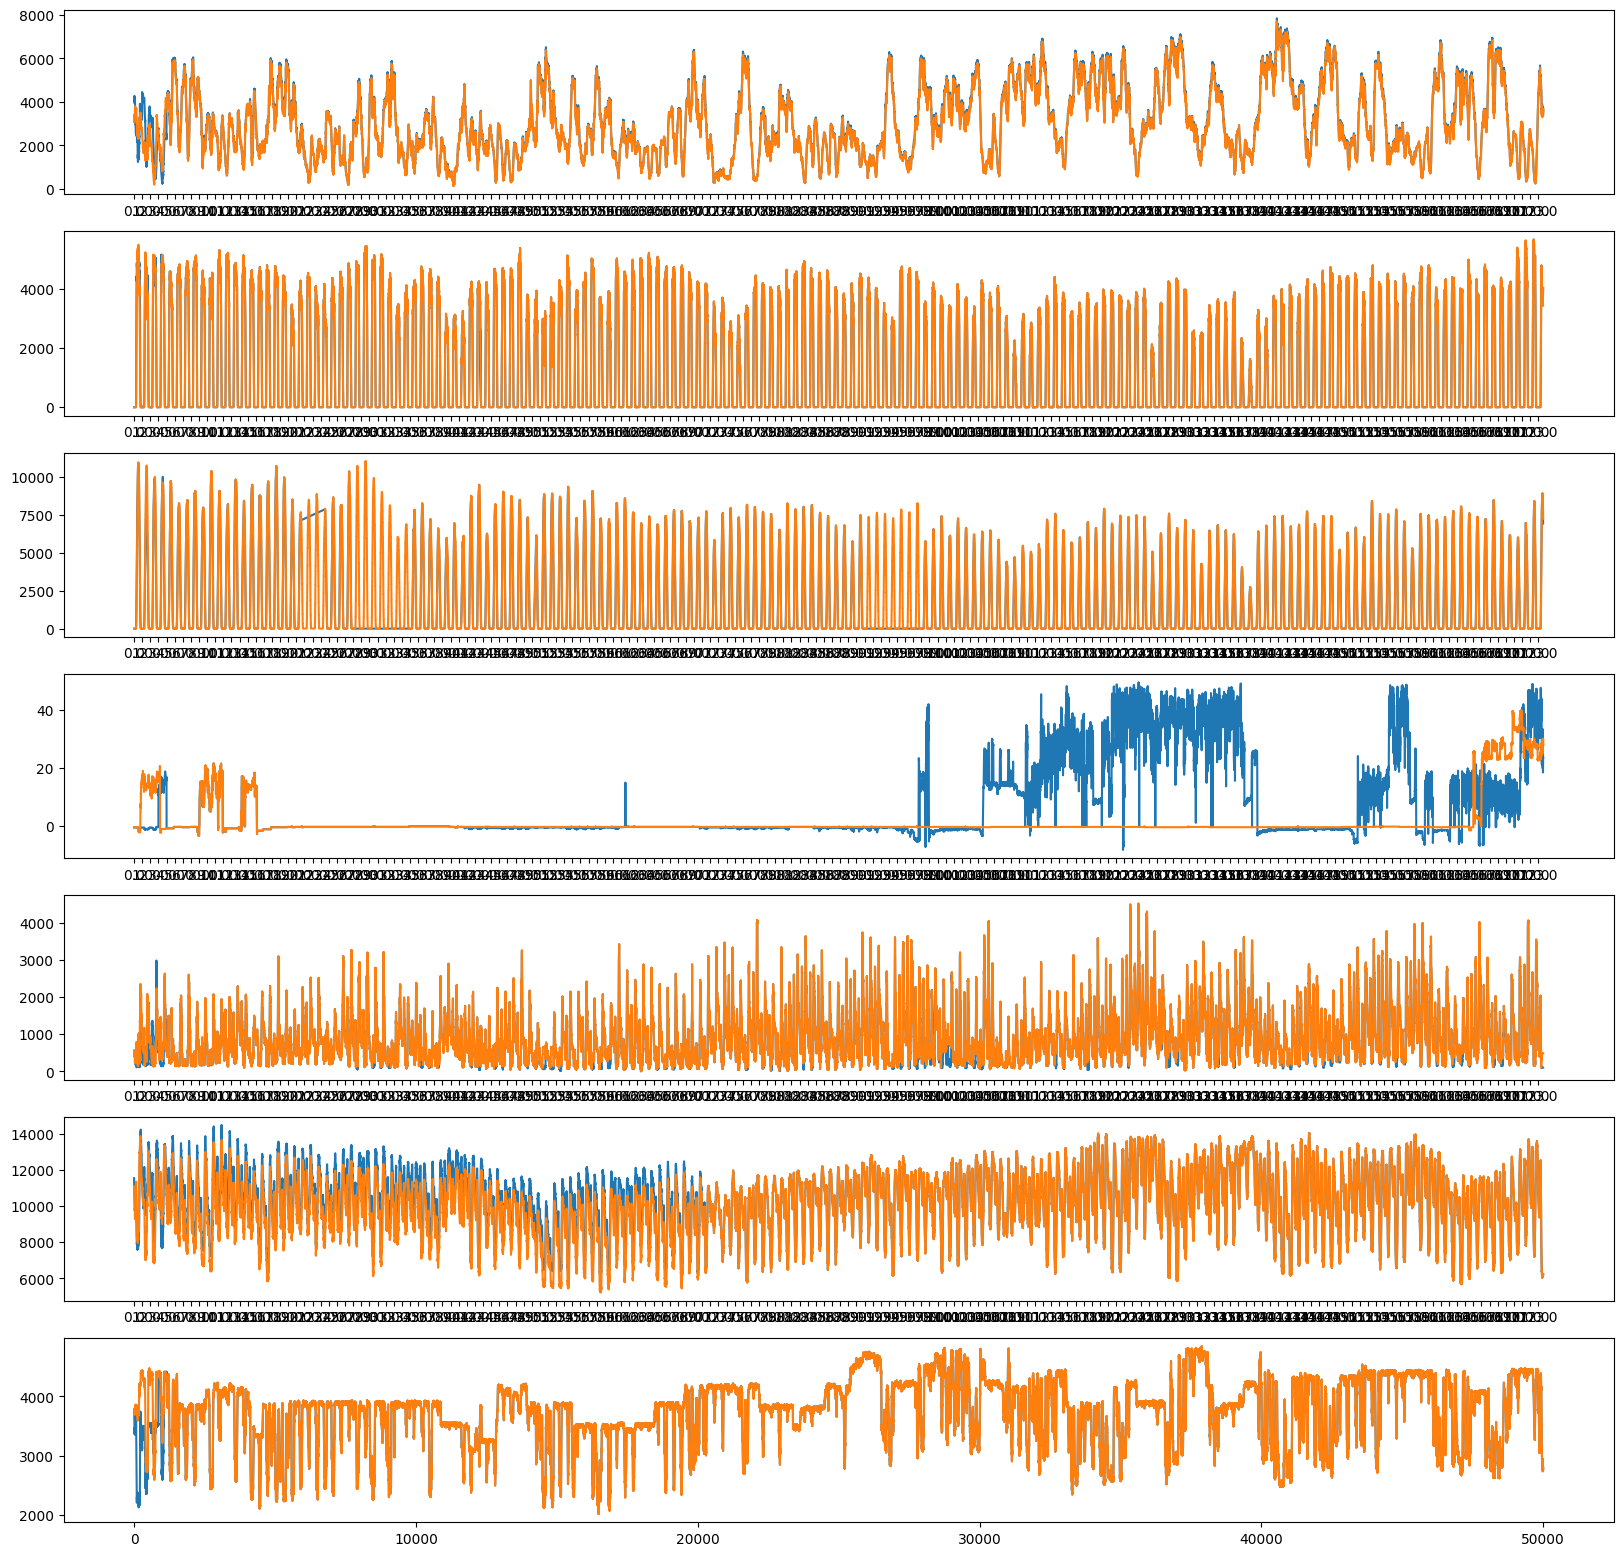

In [43]:
n = 50000
fig = plt.figure(figsize=(20,80))#,constrained_layout=True)
gs = plt.GridSpec(28, 1, figure=fig)
ax = fig.add_subplot(gs[0, :])
ax.plot(feat_AUS['Wind'].values[:n])
ax.plot(feat_nemosis['generation: Wind, Descriptor: Wind'].values[5*12*24:5*12*24+n])
ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))

ax = fig.add_subplot(gs[1, :])
ax.plot(feat_AUS['Solar (Utility)'].values[:n])
ax.plot(feat_nemosis['generation: Solar, Descriptor: Solar'].values[5*12*24:5*12*24+n])
ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))

ax = fig.add_subplot(gs[2, :])
ax.plot(feat_AUS['Solar (Rooftop)'].values[:n])
ax.plot(feat_nemosis['ROOFTOP_PV_ACTUAL'].values[5*12*24:5*12*24+n])
ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))

ax = fig.add_subplot(gs[3, :])
ax.plot(feat_AUS['Biomass'].values[:n])
ax.plot(feat_nemosis['generation: Renewable/ Biomass / Waste, Descriptor: Bagasse'].values[5*12*24:5*12*24+n])
ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))

ax = fig.add_subplot(gs[4, :])
ax.plot(feat_AUS['Hyrdo'].values[:n])
ax.plot(feat_nemosis['generation: Hydro, Descriptor: Water'].values[5*12*24:5*12*24+n])
ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))

ax = fig.add_subplot(gs[5, :])
ax.plot(feat_AUS['Coal (Black)'].values[:n])
ax.plot(feat_nemosis['generation: Fossil, Descriptor: Black Coal'].values[5*12*24:5*12*24+n])
ax.set_xticks(np.arange(0,n,12*24), labels=(np.arange(0,n,12*24)/(12*24)))

ax = fig.add_subplot(gs[6, :])
ax.plot(feat_AUS['Coal (Brown)'].values[:n])
ax.plot(feat_nemosis['generation: Fossil, Descriptor: Brown Coal'].values[5*12*24:5*12*24+n])
plt.show()

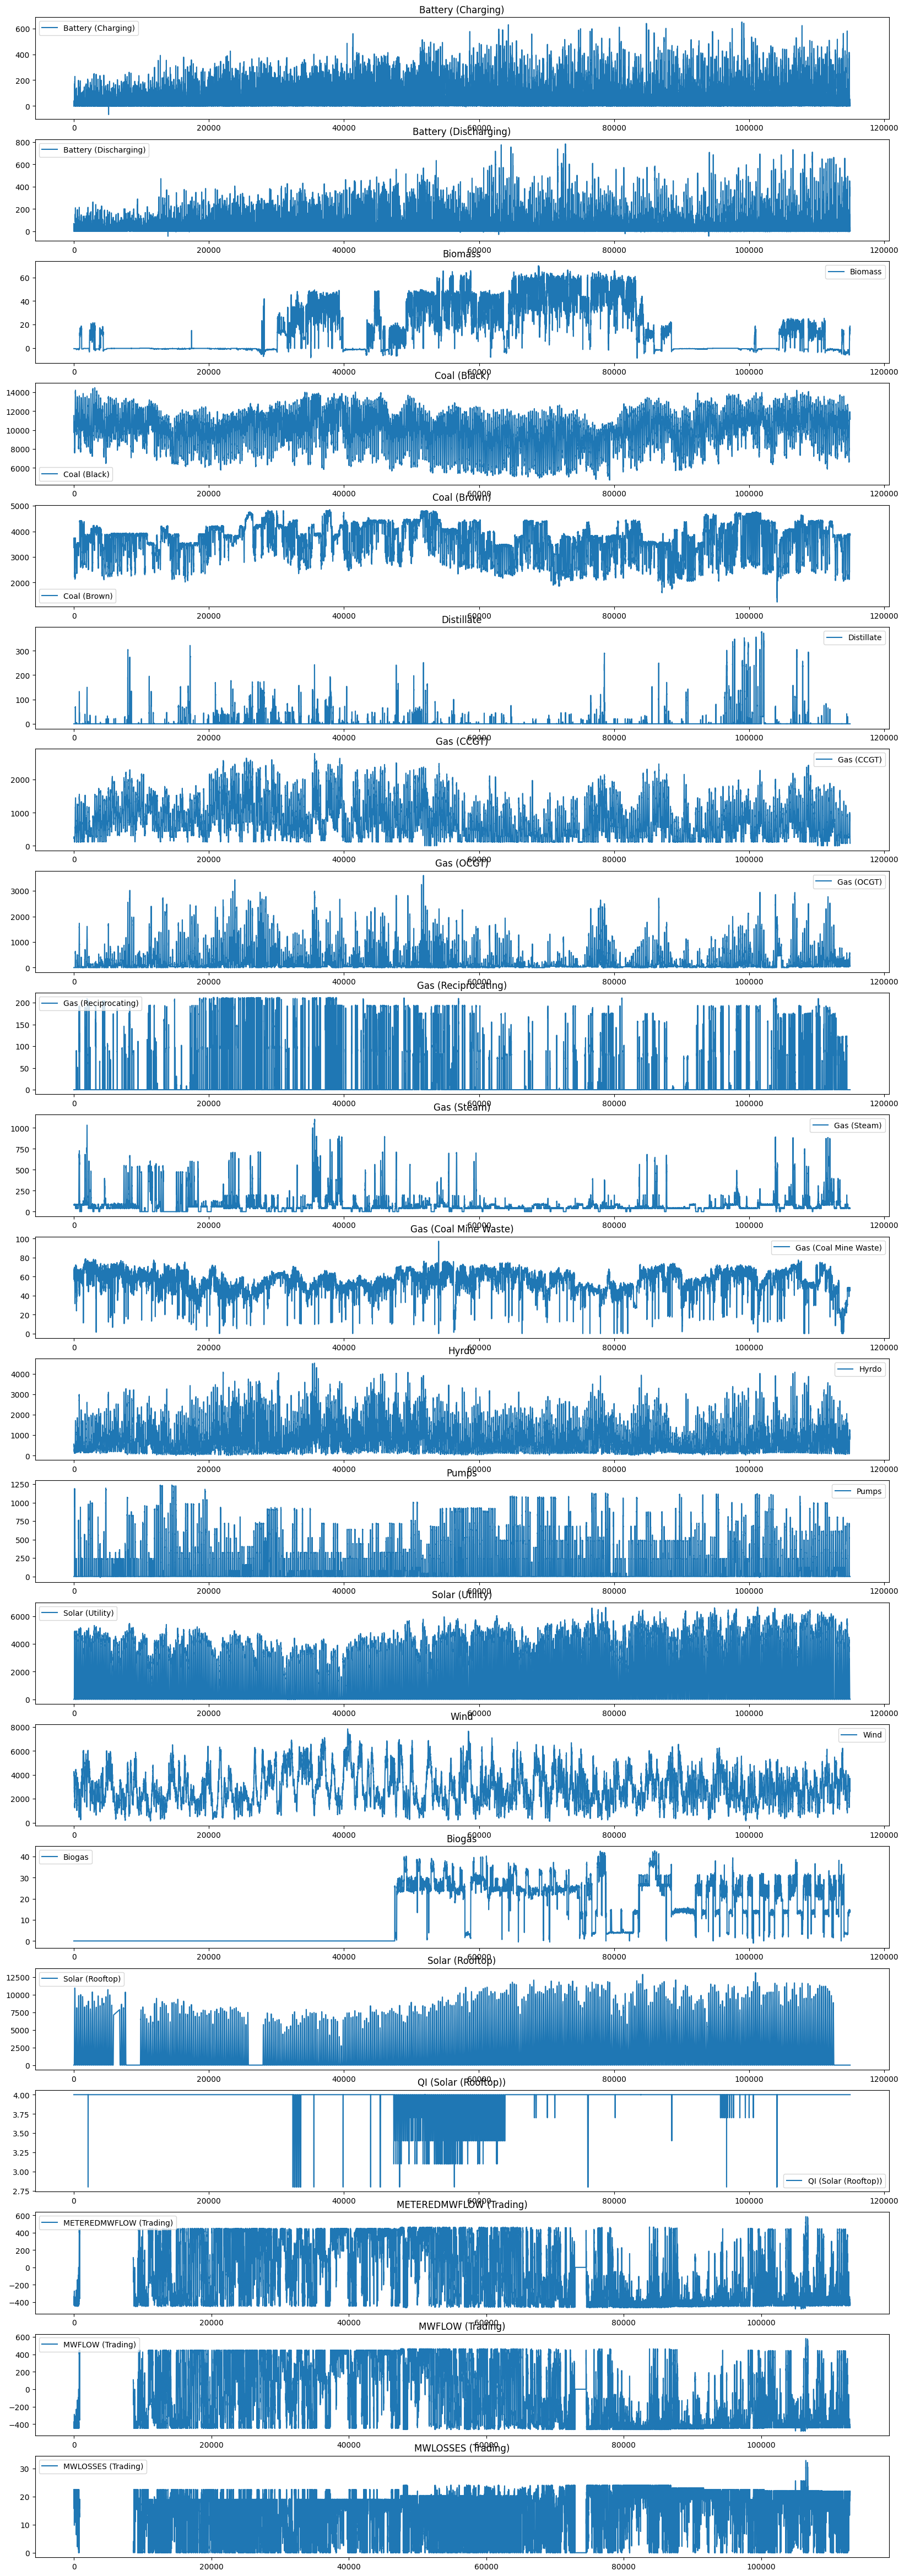

In [31]:
#plt.plot(feat_AUS['Aggregator (VPP)'].values)
fig = plt.figure(figsize=(20,80))#,constrained_layout=True)
gs = plt.GridSpec(28, 1, figure=fig)
i = 0
for col in (feat_AUS.columns):
    if feat_AUS[col].max() < 0.1 and col not in ['Wind','Solar (Utility)','Solar (Rooftop)', 'Biomass', 'Hyrdo']:
        continue
    else:
        ax = fig.add_subplot(gs[i, :])
        ax.plot(feat_AUS[col].values, label = col)
        #ax.plot(feat_nemosis[col].values)
        ax.set_title(col)
        ax.legend()
        i+=1